# Universidad del Valle de Guatemala


##### Create a virtual env and run pip install -r requirements.txt
##### Laboratorio 6: Autocodificadores
* Juan Marroquin 19845
* Carlos Raxtum 19721

import libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


### encoder liberies 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

En la tabla que van a trabajar, se encuentra el consumo promedio de 17 tipos de comida, en gramos por persona por semana, para cada país del Reino Unido (UK).

La tabla tiene algunas variaciones interesantes en diferentes tipos de comida, pero a nivel general las diferencias no son tan notables.

**TAREA:  Ejecute la siguiente instrucción para leer los datos**

Es posible que tenga que modificar la instrucción de acuerdo al lugar donde descargó el archivo.

In [2]:
df = pd.read_csv('./UK_foods.csv', index_col = 'Unnamed: 0')

###### Transpose dataframe 

In [3]:
df = df.T

In [4]:
df.head()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


**TAREA: Despliegue el DataFrame**

##### Data Frame Info

In [5]:
df.shape

(4, 17)

In [6]:
df.columns

Index(['Cheese', 'Carcass_meat ', 'Other_meat ', 'Fish', 'Fats_and_oils ',
       'Sugars', 'Fresh_potatoes ', 'Fresh_Veg ', 'Other_Veg ',
       'Processed_potatoes ', 'Processed_Veg ', 'Fresh_fruit ', 'Cereals ',
       'Beverages', 'Soft_drinks ', 'Alcoholic_drinks ', 'Confectionery '],
      dtype='object')

In [7]:
df.index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cheese,4.0,94.25,18.856917,66.0,93.75,103.0,103.50,105.0
Carcass_meat,4.0,245.25,16.500000,227.0,238.25,243.5,250.50,267.0
Other_meat,4.0,706.00,93.427334,586.0,660.25,717.5,763.25,803.0
Fish,4.0,130.50,29.557853,93.0,114.75,134.5,150.25,160.0
Fats_and_oils,4.0,205.25,22.366269,184.0,190.75,201.0,215.50,235.0
Sugars,4.0,154.25,15.478480,139.0,145.00,151.5,160.75,175.0
Fresh_potatoes,4.0,798.25,200.755863,566.0,681.50,797.0,913.75,1033.0
Fresh_Veg,4.0,208.00,60.188592,143.0,164.00,212.0,256.00,265.0
Other_Veg,4.0,457.75,92.471167,355.0,402.25,453.0,508.50,570.0
Processed_potatoes,4.0,202.00,13.735599,187.0,195.25,200.5,207.25,220.0


##### Color Map of DataFrame

<AxesSubplot:>

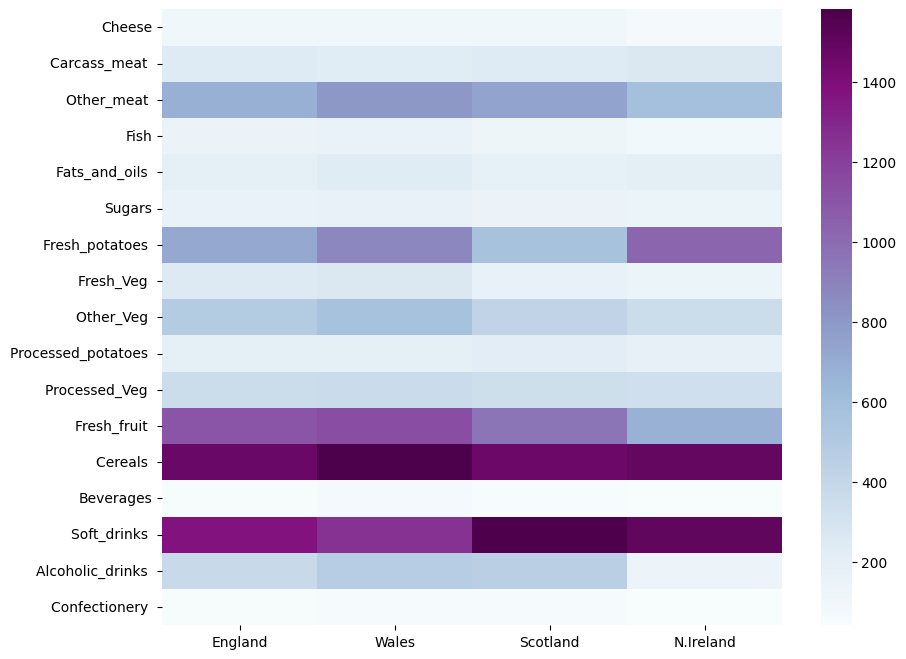

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.transpose(),cmap="BuPu")

¿Existe algún país que sobresalga por diferencia de los otros?  Puede ser bastante difícil determinar esto solo por la imagen.

* Se puede observar que en Gales existe mas variacion a la hora del consumo de alimentos, asi mismo en Irlanda del Norte, existe una menor variacion a la hora de comer, se puede apreciar que suelen comer lo mismo

¿Habrá algún par de países que parezcan muy similares entre si?
* Inglatera y Gales comparte un mapa de calor similar, aunque como se menciono anteriormente, que Gales es mas variado, esto a que en ciertas comidas hay mas consumo por parte de los Galeses. El porque de que estos paises compartan un mapa de color muy similar se debe a la cercacina que estos tienen y todos los lazos historicos que hacen que las costumbres y comidas sean muy similares, a comparacion de los otros dos paises del Reino Unido

**TAREA:  Realice las importaciones necesarias para construir un AutoCodificador.  La meta será reducir las dimensiones de 17 --> 2 y ver si hay países que resalten como diferentes.**

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

#### Create an encoder

In [11]:
encoder = Sequential()
encoder.add(Dense(units=8,activation='relu',input_shape=[17]))
encoder.add(Dense(units=4,activation='relu',input_shape=[8]))
encoder.add(Dense(units=2,activation='relu',input_shape=[4]))

#### Create a decoder

In [12]:
decoder = Sequential()
decoder.add(Dense(units=4,activation='relu',input_shape=[2]))
decoder.add(Dense(units=8,activation='relu',input_shape=[4]))
decoder.add(Dense(units=17,activation='relu',input_shape=[8]))

In [13]:
eliminador_ruido = Sequential([encoder, 
                               decoder])

In [14]:
eliminador_ruido.compile(loss = "binary_crossentropy", 
                         optimizer = 'adam', 
                         metrics =['accuracy'])

#### Combine the encoder and decoder to be an autoencoder

In [15]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

C:\Users\CRaxtun\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


#### Create a MinMaxScaler to scale the data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df.transpose().values)
scaled_df

array([[0.03596615, 0.0256917 , 0.03291639, 0.01706485],
       [0.13469676, 0.10737813, 0.12442396, 0.15426621],
       [0.44499295, 0.48682477, 0.45885451, 0.37201365],
       [0.06558533, 0.06324111, 0.04542462, 0.03549488],
       [0.09802539, 0.11264822, 0.08624095, 0.11467577],
       [0.0719323 , 0.07312253, 0.06188282, 0.0668942 ],
       [0.4696756 , 0.53359684, 0.33772219, 0.67713311],
       [0.1403385 , 0.13241107, 0.07768269, 0.06962457],
       [0.30606488, 0.33333333, 0.24028966, 0.21433447],
       [0.10155148, 0.09156785, 0.10994075, 0.0996587 ],
       [0.2157969 , 0.19828722, 0.18696511, 0.2       ],
       [0.73906911, 0.70685112, 0.59512837, 0.43208191],
       [1.        , 1.        , 0.92758394, 0.99180887],
       [0.00211566, 0.00592885, 0.        , 0.00409556],
       [0.93088858, 0.78524374, 1.        , 1.        ],
       [0.22637518, 0.27075099, 0.26662278, 0.06416382],
       [0.        , 0.        , 0.00592495, 0.        ]])

#### Fit the autoencoder to the scaled data for 15 epochs

In [18]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Epoch 1/15


ValueError: in user code:

    File "C:\Users\CRaxtun\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\CRaxtun\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\CRaxtun\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\CRaxtun\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\CRaxtun\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\CRaxtun\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 17), found shape=(None, 4)


#### Run the scaled data through only the encoder and predict the reduced dimensionalty output

In [19]:
encoded_2dim = encoder.predict(scaled_df)

ValueError: in user code:

    File "C:\Users\CRaxtun\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\CRaxtun\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\CRaxtun\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\CRaxtun\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\CRaxtun\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\CRaxtun\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 17), found shape=(None, 4)


In [ ]:
encoded_2dim

#### Join the encoded 2 dimensional data with the original countries index

In [ ]:
df.transpose().index

In [ ]:
results = pd.DataFrame(data=encoded_2dim,index=df.transpose().index,
                      columns=['C1','C2'])

In [ ]:
results = results.reset_index()

In [ ]:
results

#### Plot out these results in a scatterplot, labeled by their respective country

In [ ]:
sns.scatterplot(x='C1',y='C2',data=results,hue='index')

HINT

Al regresar a ver los datos en la tabla, esto tiene sentido: los Nor-Irlandeses comen mucho más gramos de papas frescas y mucho menos de frutas frescas, queso, pescado y bebidad alcohólicas.

Es buena seña que la estructura que se visualiza refleje un hecho grande de la geografía real: Irlanda del Norte es el único de los cuatro países que no están en la isla de Gran Bretaña. (Si tiene confusión entre Inglaterra, el Reino Unido y Gran Bretaña, vea: este video.)